# Concurrency vs Parallelism
### Threads vs. Processes
Content in this notebook is mainly from here:  
https://medium.com/contentsquare-engineering-blog/multithreading-vs-multiprocessing-in-python-ece023ad55a  
and here (more extensive):  
https://medium.com/@bfortuner/python-multithreading-vs-multiprocessing-73072ce5600b


### 6 Facts about threads and processes in python
1. There can only be one thread running at any given time in a python process.
2. Multiprocessing is parallelism. Multithreading is concurrency.
3. Multiprocessing is for increasing speed. Multithreading is for hiding latency.
4. Multiprocessing is best for computations. Multithreading is best for IO.
5. If you have CPU heavy tasks, use multiprocessing with n_process = n_cores and never more. Never!
6. If you have IO heavy tasks, use multithreading

### Using an abstraction layer
We can then implement threads and processes in much the same way:
`ThreadPoolExecutor`  
`ProcessPoolExecutor`

In [1]:
from concurrent.futures import ThreadPoolExecutor
from concurrent.futures import ProcessPoolExecutor
import multiprocessing

import time 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def cpu_heavy_time_it(x):
    """purpose is to use much cpu time"""
    print('I am number:', x) 
    start = time.time()
    count = 0
    for i in range(10**8):
        count += i
    stop = time.time()
    return start, stop

In [18]:
import webget
def io_heavy_time_it(x):
    """purpose is to use much IO latency time"""
    url = 'https://api.github.com/repositories/'
    print('I am number:', x)
    start = time.time()
    count = 0
    for i in range(1,50): 
        new_url = url+str(i)
        print(new_url)
        try:
            webget.download(new_url,to=f'todelete/todelete{i}.txt')
        except:
            print('Exception occured')
    stop = time.time()
    return start, stop

In [4]:
def multithreading(func, args, workers=5):
    with ThreadPoolExecutor(workers) as ex:
        res = ex.map(func, args)
    return list(res)

def multiprocessing(func, args, workers=multiprocessing.cpu_count()):
    with ProcessPoolExecutor(workers) as ex:
        res = ex.map(func, args)
    return list(res)

In [5]:
# 8 tasks running in 4 threads
#multithreading(cpu_heavy_time_it, range(1,9),4)
io_heavy_time_it('')

I am number: 
https://api.github.com/repositories/1
https://api.github.com/repositories/2
Exception occured
https://api.github.com/repositories/3
Exception occured
https://api.github.com/repositories/4
Exception occured
https://api.github.com/repositories/5
Exception occured
https://api.github.com/repositories/6
Exception occured
https://api.github.com/repositories/7
Exception occured
https://api.github.com/repositories/8
Exception occured
https://api.github.com/repositories/9
Exception occured
https://api.github.com/repositories/10
Exception occured
https://api.github.com/repositories/11
Exception occured
https://api.github.com/repositories/12
Exception occured
https://api.github.com/repositories/13
Exception occured
https://api.github.com/repositories/14
Exception occured
https://api.github.com/repositories/15
Exception occured
https://api.github.com/repositories/16
Exception occured
https://api.github.com/repositories/17
Exception occured
https://api.github.com/repositories/18
Excep

(1581202380.9884882, 1581202407.428922)

In [6]:
def visualize_runtimes(results, title):
    print(results) 
    start, stop = np.array(results).T
    # horizontal bar plot plt.barh
    plt.barh(range(len(start)), stop - start)
    plt.grid(axis='x')
    plt.ylabel("Tasks")
    plt.xlabel("Seconds")
    plt.xlim(0, 22.5)
    ytks = range(len(results))
    plt.yticks(ytks, ['job {}'.format(exp) for exp in ytks])
    plt.title(title)
    return stop[-1] - start[0]
# visualize_runtimes(multithreading(cpu_heavy, range(4), 4), "Multithreading")


###### plt.subplot(1, 2, 1)
visualize_runtimes(multithreading(cpu_heavy_time_it, range(1,5)), "Multithreading")
plt.subplot(1, 2, 2)
visualize_runtimes(multiprocessing(cpu_heavy_time_it, range(1,5)), "Multiprocessing")
plt.show()


I am number:I am number: 2
https://api.github.com/repositories/1 
I am number: 3
https://api.github.com/repositories/1
1
https://api.github.com/repositories/1
I am number: 4
https://api.github.com/repositories/1
I am number: 5
https://api.github.com/repositories/1
Exception occured
https://api.github.com/repositories/2
Exception occured
Exception occured
https://api.github.com/repositories/2
https://api.github.com/repositories/2Exception occured
https://api.github.com/repositories/2

Exception occured
https://api.github.com/repositories/2
Exception occured
https://api.github.com/repositories/3
Exception occured
https://api.github.com/repositories/3
Exception occured
https://api.github.com/repositories/3
Exception occured
https://api.github.com/repositories/3
Exception occured
https://api.github.com/repositories/3
Exception occured
https://api.github.com/repositories/4
Exception occured
https://api.github.com/repositories/4
Exception occured
https://api.github.com/repositories/4
Excepti

Exception occured
https://api.github.com/repositories/30
Exception occured
https://api.github.com/repositories/31Exception occured

Exception occuredhttps://api.github.com/repositories/30

https://api.github.com/repositories/30
Exception occured
https://api.github.com/repositories/31
Exception occured
https://api.github.com/repositories/31
Exception occuredException occured

https://api.github.com/repositories/31https://api.github.com/repositories/32

Exception occured
https://api.github.com/repositories/31
Exception occured
https://api.github.com/repositories/32
Exception occured
https://api.github.com/repositories/32
Exception occured
https://api.github.com/repositories/33
Exception occured
https://api.github.com/repositories/32
Exception occured
https://api.github.com/repositories/32
Exception occured
https://api.github.com/repositories/33
Exception occured
https://api.github.com/repositories/33
Exception occuredException occured
https://api.github.com/repositories/33

Exception occ

Exception occured
https://api.github.com/repositories/23
Exception occured
https://api.github.com/repositories/24
Exception occured
Exception occured
https://api.github.com/repositories/24
https://api.github.com/repositories/25
Exception occured
https://api.github.com/repositories/25
Exception occured
https://api.github.com/repositories/26
Exception occuredException occured

https://api.github.com/repositories/27
https://api.github.com/repositories/26
Exception occured
https://api.github.com/repositories/28
Exception occured
https://api.github.com/repositories/27
Exception occuredException occured

https://api.github.com/repositories/28
https://api.github.com/repositories/29
Exception occured
https://api.github.com/repositories/29
Exception occured
https://api.github.com/repositories/30
Exception occured
Exception occured
https://api.github.com/repositories/30
https://api.github.com/repositories/31
Exception occured
https://api.github.com/repositories/32
Exception occured
https://api.g

https://api.github.com/repositories/13
https://api.github.com/repositories/13
Exception occured
https://api.github.com/repositories/13
Exception occured
https://api.github.com/repositories/13
Exception occured
Exception occured
Exception occured
https://api.github.com/repositories/14
https://api.github.com/repositories/13
https://api.github.com/repositories/14
Exception occured
Exception occured
https://api.github.com/repositories/14
https://api.github.com/repositories/14
Exception occured
https://api.github.com/repositories/14
Exception occured
https://api.github.com/repositories/14
Exception occured
https://api.github.com/repositories/15
Exception occured
https://api.github.com/repositories/14
Exception occured
https://api.github.com/repositories/15
Exception occured
Exception occured
https://api.github.com/repositories/15
https://api.github.com/repositories/15
Exception occured
https://api.github.com/repositories/15
Exception occured
https://api.github.com/repositories/15
Exception 

Exception occured
https://api.github.com/repositories/32
Exception occured
https://api.github.com/repositories/34
Exception occured
https://api.github.com/repositories/34
Exception occured
https://api.github.com/repositories/34
Exception occured
https://api.github.com/repositories/35
Exception occured
Exception occured
https://api.github.com/repositories/35
https://api.github.com/repositories/34
Exception occured
https://api.github.com/repositories/33
Exception occured
https://api.github.com/repositories/35
Exception occured
https://api.github.com/repositories/35
Exception occured
https://api.github.com/repositories/35
Exception occured
https://api.github.com/repositories/36
Exception occured
https://api.github.com/repositories/35
Exception occured
https://api.github.com/repositories/34
Exception occured
https://api.github.com/repositories/36
Exception occured
https://api.github.com/repositories/36
Exception occured
https://api.github.com/repositories/36
Exception occured
https://api.g

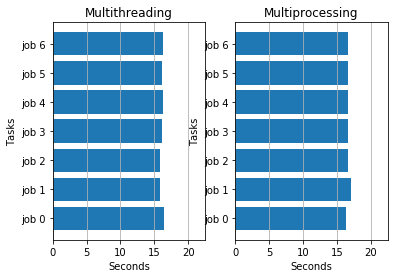

In [19]:
plt.subplot(1, 2, 1)
visualize_runtimes(multithreading(io_heavy_time_it, range(1,8)), "Multithreading")
plt.subplot(1, 2, 2)
visualize_runtimes(multiprocessing(io_heavy_time_it, range(1,8)), "Multiprocessing")
plt.show()